Linear Discriminant Analysis (LDA) is a classification technique that assumes a Gaussian distribution over variables for each class. Different means are chosen for different classes but same covariance matrix is chosen for all classes. Taking same covariance matrix for all classes is indeed a restricting assumption but it works well when this assumption is approximately satisfied and number of data points is less. Once Gaussians are fit for each class, posterior probability of a data point belonging to a particular class is determined by applying Bayes' rule. The parameters of the distribution are learnt form data.

We will add a detailed theory of LDA to this post at a later time. For the time being we direct the interested reader to [this excellent book.](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf)


## Description of data

[Detailed discussion of how to prepare the data and its source can be found in this post.](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/SVM_wavelet_energy_multiclass_cwru_python.ipynb) Here we will only mention about different classes of the data. There are 10 classes and data for each class are taken at a load of 1hp. The classes are:

* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Inner race fault (0.007 inch)
* C5  : Inner race fault (0.014 inch)
* C6  : Inner race fault (0.021 inch)
* C7  : Normal
* C8  : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C9  : Outer race fault (0.014 inch, 6 O'clock)
* C10 : Outer race fault (0.021 inch, 6 O'clock)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### How to get data?
Readers can download the `.csv` file used in this notebook from [here](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_wav_energy8_48k_2048_load_1.csv). Another convenient way is to [download the whole repository](https://codeload.github.com/biswajitsahoo1111/cbm_codes_open/legacy.zip/master) and run the downloaded notebooks.

In [2]:
data_wav_energy = pd.read_csv("./data/feature_wav_energy8_48k_2048_load_1.csv")

In [3]:
train_data, test_data = train_test_split(data_wav_energy, test_size = 750, stratify = data_wav_energy['fault'],
                                         random_state = 1282)

In [4]:
lda_clf = LinearDiscriminantAnalysis()

In [5]:
lda_clf.fit(train_data.iloc[:,:-1], train_data['fault'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [6]:
train_predictions = lda_clf.predict(train_data.iloc[:,:-1])
test_predictions = lda_clf.predict(test_data.iloc[:,:-1])

In [7]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  0.8741935483870967


In [8]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

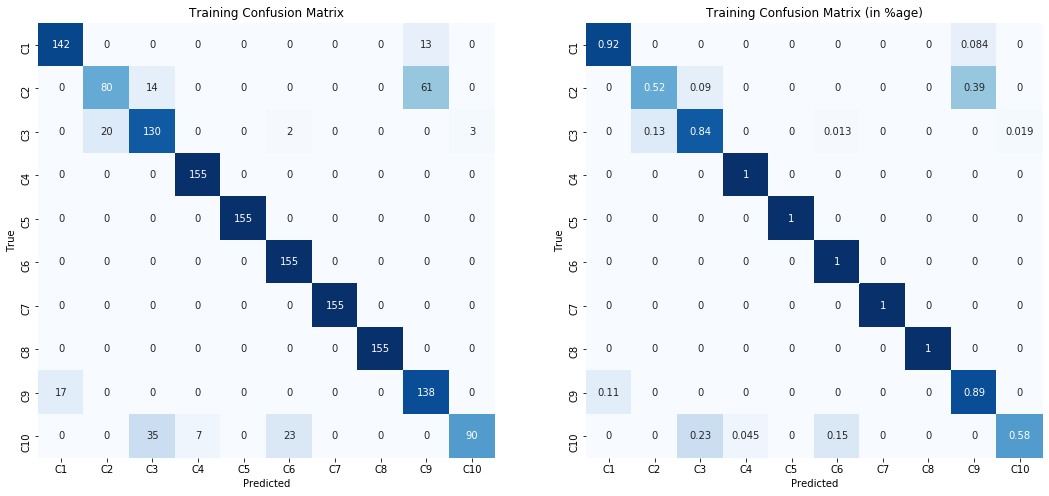

In [9]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_matrix/155, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

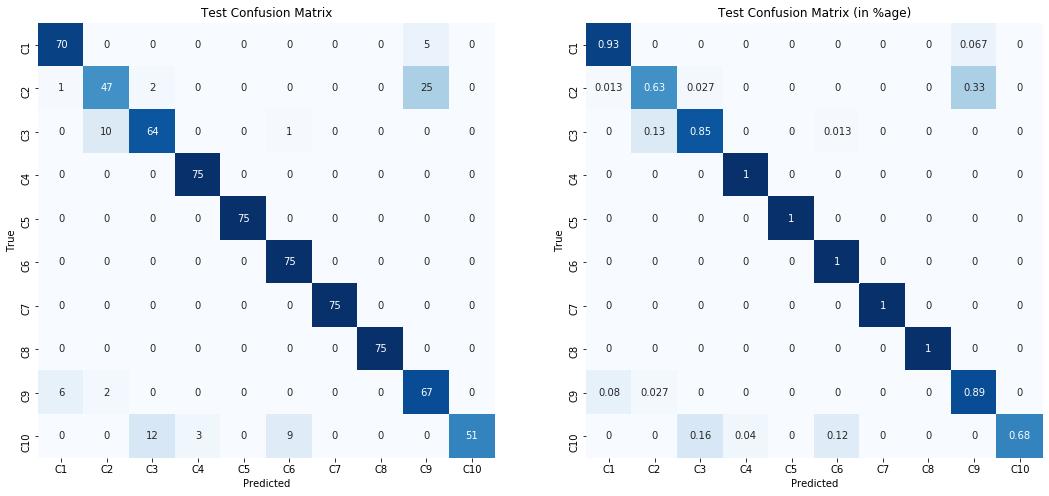

In [10]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.8986666666666666


Note that in this example, we have not scaled our data. Scaling has no effect on the result. Readers can easily check that. 

We will see later that quadratic discriminant analysis gives much better results that this. So probably the assumption of using same covariance matrix for all classes is a bad one for this particular dataset. 

[To see results of other techniques applied to public condition monitoring datasets, visit this page](https://biswajitsahoo1111.github.io/cbm_codes_open/).